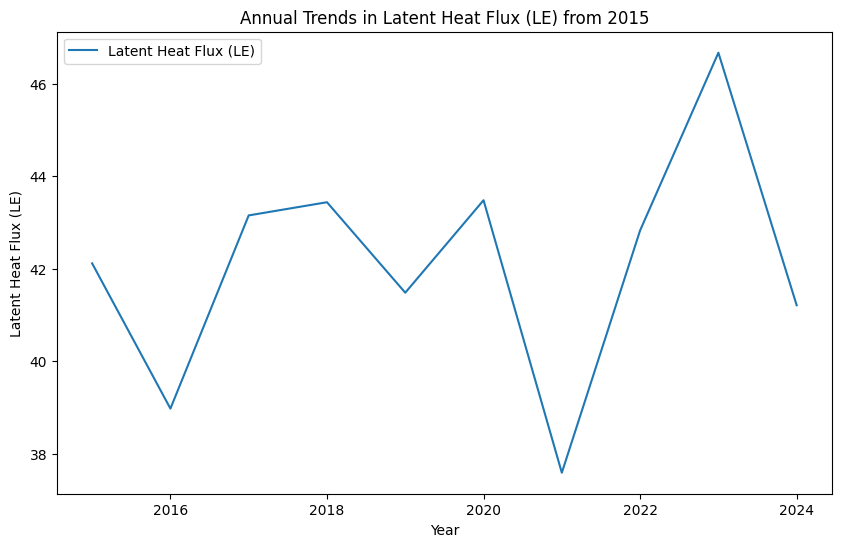

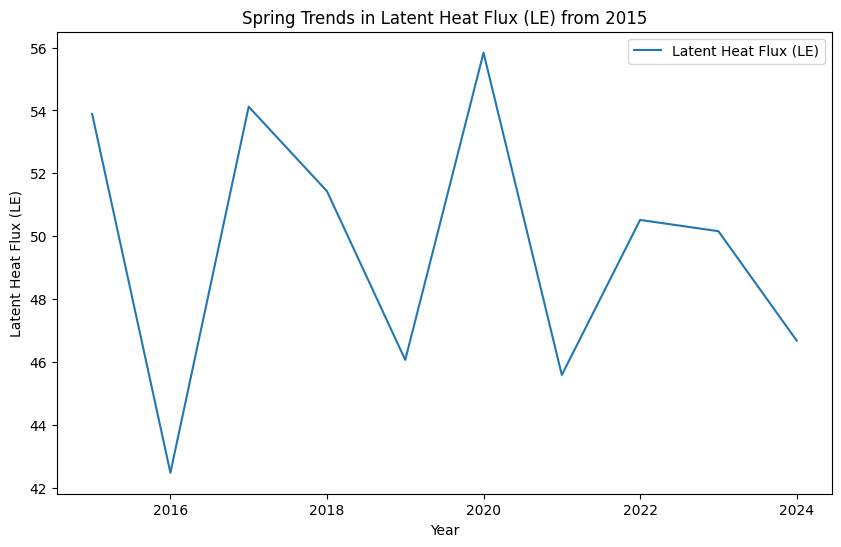

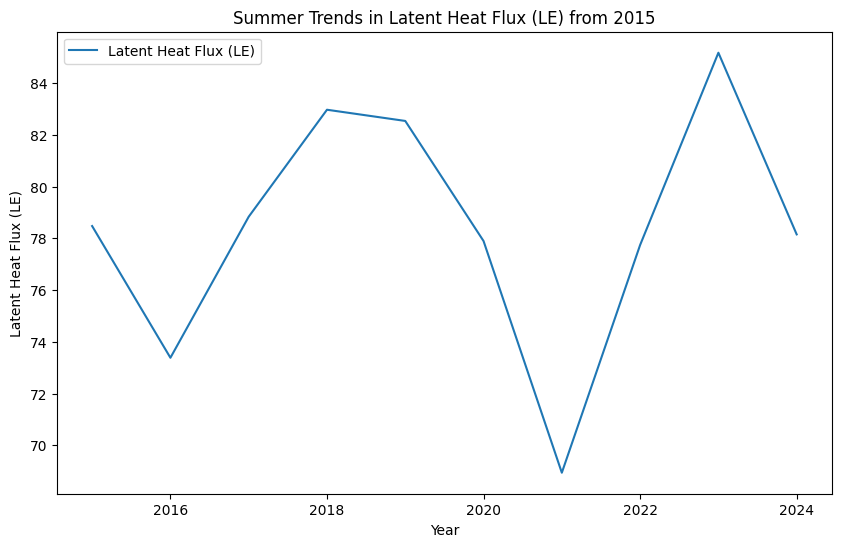

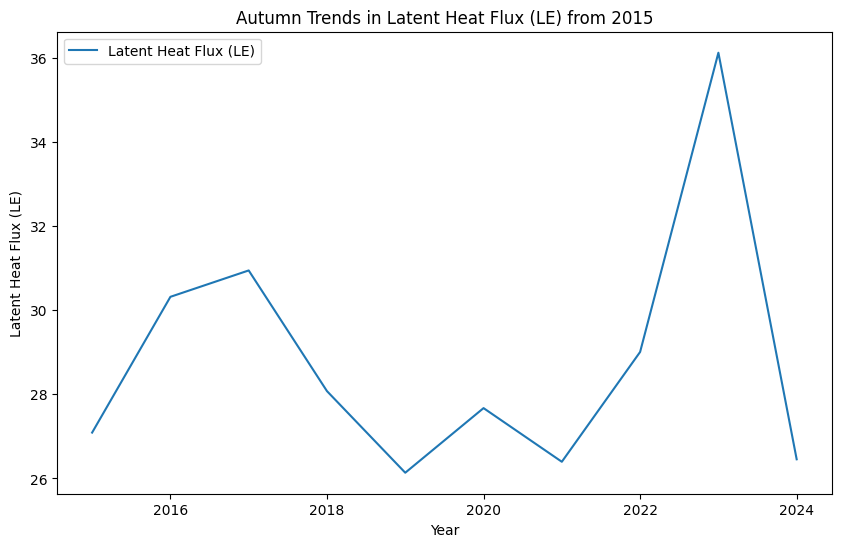

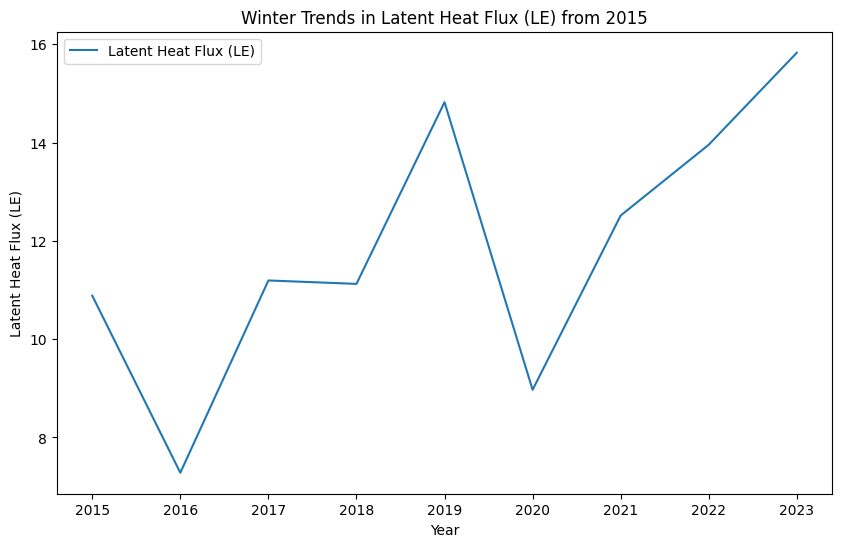

Annual Trend Analysis:
{'trend': 'no trend', 'h': np.False_, 'p_value': np.float64(0.7205147871362552), 'z_score': np.float64(0.35777087639996635), 'sens_slope': Sens_Slope_Test(slope=np.float64(0.10946722222222387), intercept=np.float64(41.97767833333333))}

Seasonal Trend Analysis:
Spring: {'trend': 'no trend', 'h': np.False_, 'p_value': np.float64(0.5915050369949166), 'z_score': np.float64(-0.5366563145999494), 'sens_slope': Sens_Slope_Test(slope=np.float64(-0.3577333333333286), intercept=np.float64(51.94793333333331))}
Summer: {'trend': 'no trend', 'h': np.False_, 'p_value': np.float64(1.0), 'z_score': np.float64(0.0), 'sens_slope': Sens_Slope_Test(slope=np.float64(0.06419999999999959), intercept=np.float64(78.02246666666667))}
Autumn: {'trend': 'no trend', 'h': np.False_, 'p_value': np.float64(1.0), 'z_score': np.float64(0.0), 'sens_slope': Sens_Slope_Test(slope=np.float64(-0.07049407407407395), intercept=np.float64(28.19157333333333))}
Winter: {'trend': 'increasing', 'h': np.True

In [1]:
import pandas as pd
import pymannkendall as mk
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'ICOSETC_DE-RuR_FLUXNET_MM_L2.csv'
data = pd.read_csv(file_path)

# Convert the TIMESTAMP column to datetime
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'], format='%Y%m')

# Filter data for timestamps greater than December 2014
data_filtered = data[data['TIMESTAMP'] > pd.to_datetime('2014-12-31')]

# Set the TIMESTAMP column as the index
data_filtered.set_index('TIMESTAMP', inplace=True)

# Extract the LE_F_MDS column and rename it to LE
le_data = data_filtered[['LE_F_MDS']].rename(columns={'LE_F_MDS': 'LE'})

# Define a function to resample data
def resample_data(data, freq):
    return data.resample(freq).mean()

# Resample to annual means
annual_le_data = resample_data(le_data, 'YE')

# Function to handle winter season separately
def get_winter_data(data):
    winter_data = []
    years = range(data.index.year.min(), data.index.year.max())
    for year in years:
        # Select December of the current year and January, February of the next year
        winter_period = data.loc[f'{year}-12-01':f'{year+1}-02-28']
        winter_mean = winter_period.mean()
        winter_data.append(winter_mean)
    return pd.DataFrame(winter_data, index=pd.date_range(f'{years.start}-12-01', periods=len(years), freq='YE'))

# Get winter data
winter_le_data = get_winter_data(le_data)

# Resample to seasonal means for Spring, Summer, Autumn
seasonal_le_data = {
    'Spring': le_data[le_data.index.month.isin([3, 4, 5])].resample('YE').mean(),
    'Summer': le_data[le_data.index.month.isin([6, 7, 8])].resample('YE').mean(),
    'Autumn': le_data[le_data.index.month.isin([9, 10, 11])].resample('YE').mean()
}

# Include winter data
seasonal_le_data['Winter'] = winter_le_data

# Define a function to perform trend analysis
def perform_trend_analysis(data):
    if len(data['LE'].dropna()) < 3:  # Ensure there are enough data points
        return {
            'trend': None,
            'h': None,
            'p_value': None,
            'z_score': None,
            'sens_slope': None
        }
    mk_test = mk.original_test(data['LE'].dropna())
    sens_slope = mk.sens_slope(data['LE'].dropna())
    return {
        'trend': mk_test.trend,
        'h': mk_test.h,
        'p_value': mk_test.p,
        'z_score': mk_test.z,
        'sens_slope': sens_slope
    }

# Perform trend analysis on annual data
annual_le_trends = perform_trend_analysis(annual_le_data)

# Perform trend analysis on seasonal data
seasonal_le_trends = {season: perform_trend_analysis(season_data) for season, season_data in seasonal_le_data.items()}

# Define a function to plot trends
def plot_trends(data, title):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x=data.index.year, y='LE', label='Latent Heat Flux (LE)')
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Latent Heat Flux (LE)')
    plt.legend()
    plt.show()

# Plot annual trends
plot_trends(annual_le_data, 'Annual Trends in Latent Heat Flux (LE) from 2015')

# Plot seasonal trends
for season, season_data in seasonal_le_data.items():
    if not season_data.empty:
        plot_trends(season_data, f'{season} Trends in Latent Heat Flux (LE) from 2015')

# Display the trend analysis results
print("Annual Trend Analysis:")
print(annual_le_trends)

print("\nSeasonal Trend Analysis:")
for season, trends in seasonal_le_trends.items():
    print(f"{season}: {trends}")


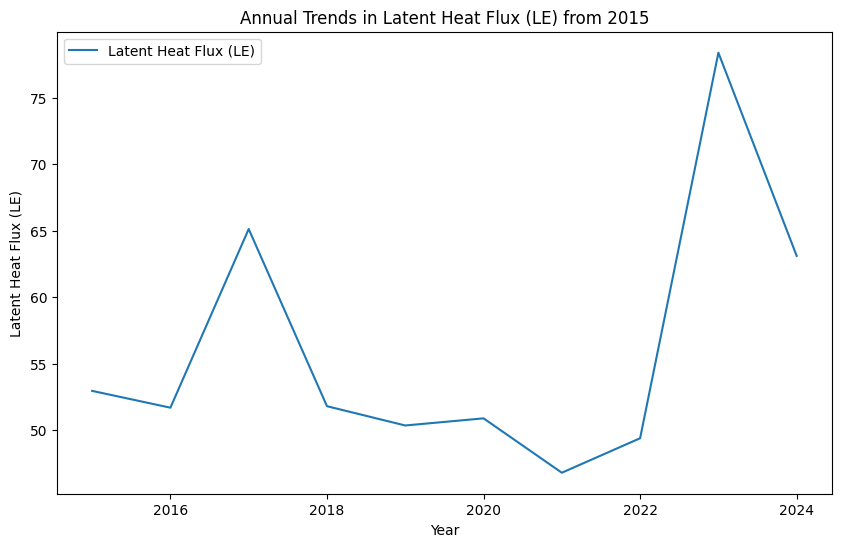

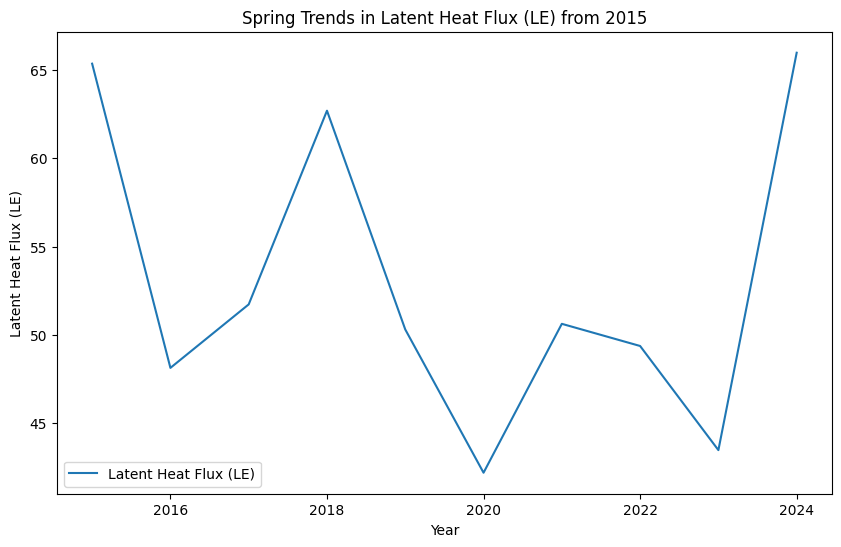

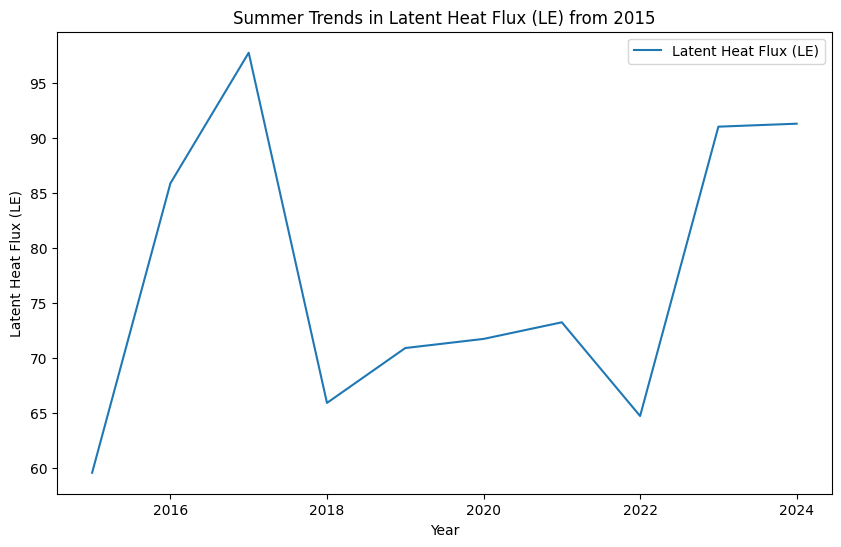

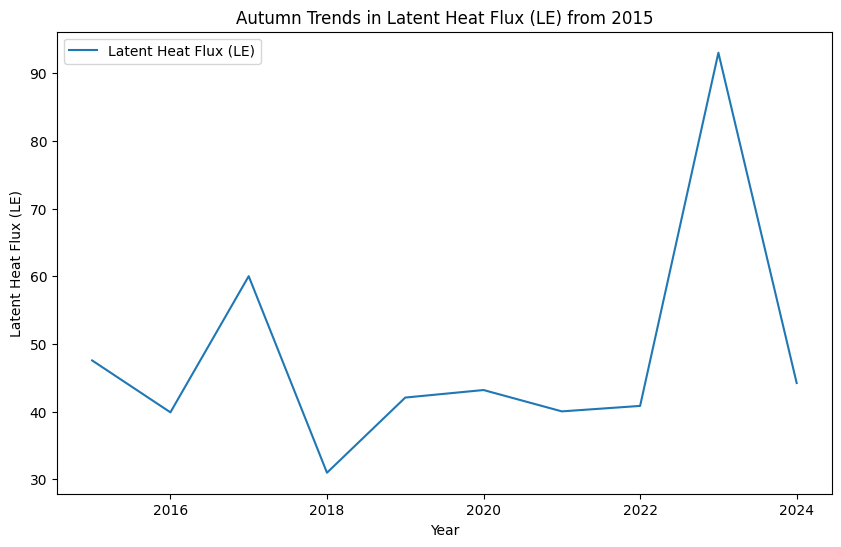

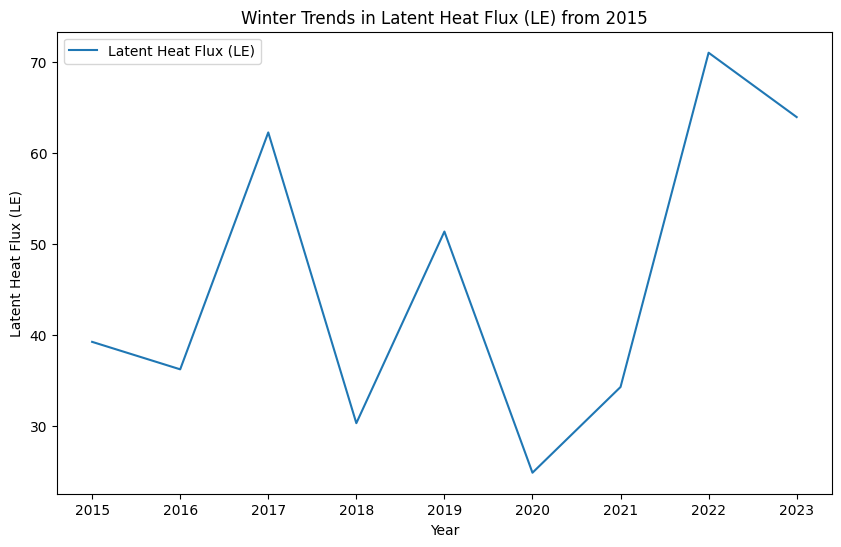

Annual Trend Analysis:
{'trend': 'no trend', 'h': np.False_, 'p_value': np.float64(0.7205147871362552), 'z_score': np.float64(-0.35777087639996635), 'sens_slope': Sens_Slope_Test(slope=np.float64(-0.31976944444444183), intercept=np.float64(53.183766666666656))}

Seasonal Trend Analysis:
Spring: {'trend': 'no trend', 'h': np.False_, 'p_value': np.float64(0.5915050369949166), 'z_score': np.float64(-0.5366563145999494), 'sens_slope': Sens_Slope_Test(slope=np.float64(-0.6651095238095236), intercept=np.float64(53.458976190476186))}
Summer: {'trend': 'no trend', 'h': np.False_, 'p_value': np.float64(0.28313087066234655), 'z_score': np.float64(1.073312629199899), 'sens_slope': Sens_Slope_Test(slope=np.float64(1.511966666666666), intercept=np.float64(65.68310000000001))}
Autumn: {'trend': 'no trend', 'h': np.False_, 'p_value': np.float64(0.5915050369949166), 'z_score': np.float64(0.5366563145999494), 'sens_slope': Sens_Slope_Test(slope=np.float64(0.4296533333333329), intercept=np.float64(40.71

In [2]:
import pandas as pd
import pymannkendall as mk
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'ICOSETC_DE-RuW_FLUXNET_MM_L2.csv'
data = pd.read_csv(file_path)

# Convert the TIMESTAMP column to datetime
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'], format='%Y%m')

# Filter data for timestamps greater than December 2014
data_filtered = data[data['TIMESTAMP'] > pd.to_datetime('2014-12-31')]

# Set the TIMESTAMP column as the index
data_filtered.set_index('TIMESTAMP', inplace=True)

# Extract the LE_F_MDS column and rename it to LE
le_data = data_filtered[['LE_F_MDS']].rename(columns={'LE_F_MDS': 'LE'})

# Define a function to resample data
def resample_data(data, freq):
    return data.resample(freq).mean()

# Resample to annual means
annual_le_data = resample_data(le_data, 'YE')

# Function to handle winter season separately
def get_winter_data(data):
    winter_data = []
    years = range(data.index.year.min(), data.index.year.max())
    for year in years:
        # Select December of the current year and January, February of the next year
        winter_period = data.loc[f'{year}-12-01':f'{year+1}-02-28']
        winter_mean = winter_period.mean()
        winter_data.append(winter_mean)
    return pd.DataFrame(winter_data, index=pd.date_range(f'{years.start}-12-01', periods=len(years), freq='YE'))

# Get winter data
winter_le_data = get_winter_data(le_data)

# Resample to seasonal means for Spring, Summer, Autumn
seasonal_le_data = {
    'Spring': le_data[le_data.index.month.isin([3, 4, 5])].resample('YE').mean(),
    'Summer': le_data[le_data.index.month.isin([6, 7, 8])].resample('YE').mean(),
    'Autumn': le_data[le_data.index.month.isin([9, 10, 11])].resample('YE').mean()
}

# Include winter data
seasonal_le_data['Winter'] = winter_le_data

# Define a function to perform trend analysis
def perform_trend_analysis(data):
    if len(data['LE'].dropna()) < 3:  # Ensure there are enough data points
        return {
            'trend': None,
            'h': None,
            'p_value': None,
            'z_score': None,
            'sens_slope': None
        }
    mk_test = mk.original_test(data['LE'].dropna())
    sens_slope = mk.sens_slope(data['LE'].dropna())
    return {
        'trend': mk_test.trend,
        'h': mk_test.h,
        'p_value': mk_test.p,
        'z_score': mk_test.z,
        'sens_slope': sens_slope
    }

# Perform trend analysis on annual data
annual_le_trends = perform_trend_analysis(annual_le_data)

# Perform trend analysis on seasonal data
seasonal_le_trends = {season: perform_trend_analysis(season_data) for season, season_data in seasonal_le_data.items()}

# Define a function to plot trends
def plot_trends(data, title):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x=data.index.year, y='LE', label='Latent Heat Flux (LE)')
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Latent Heat Flux (LE)')
    plt.legend()
    plt.show()

# Plot annual trends
plot_trends(annual_le_data, 'Annual Trends in Latent Heat Flux (LE) from 2015')

# Plot seasonal trends
for season, season_data in seasonal_le_data.items():
    if not season_data.empty:
        plot_trends(season_data, f'{season} Trends in Latent Heat Flux (LE) from 2015')

# Display the trend analysis results
print("Annual Trend Analysis:")
print(annual_le_trends)

print("\nSeasonal Trend Analysis:")
for season, trends in seasonal_le_trends.items():
    print(f"{season}: {trends}")


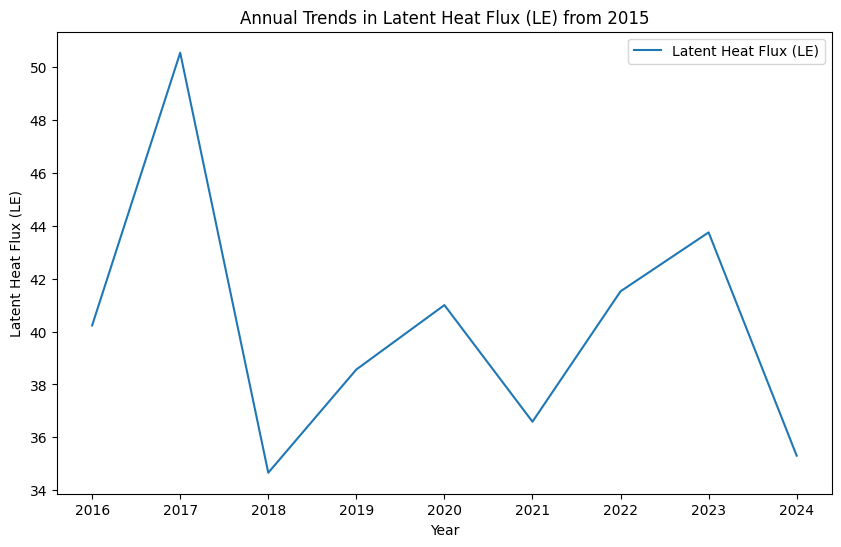

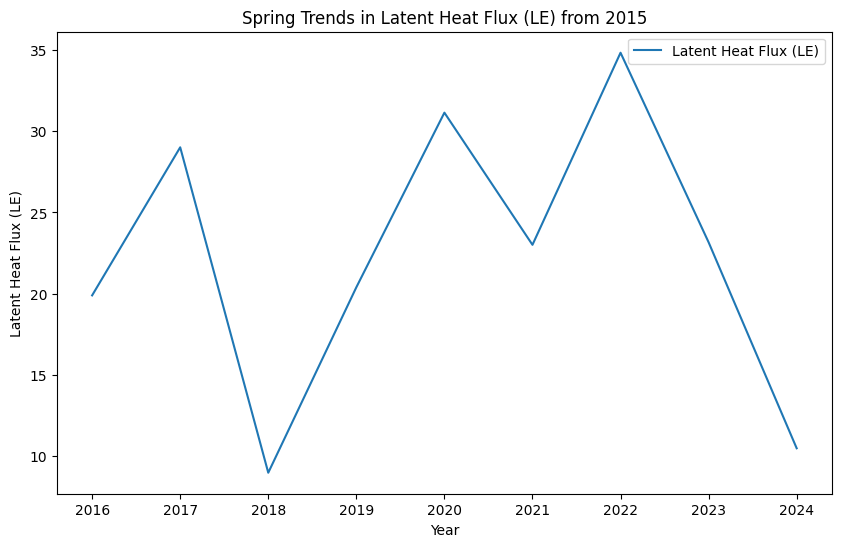

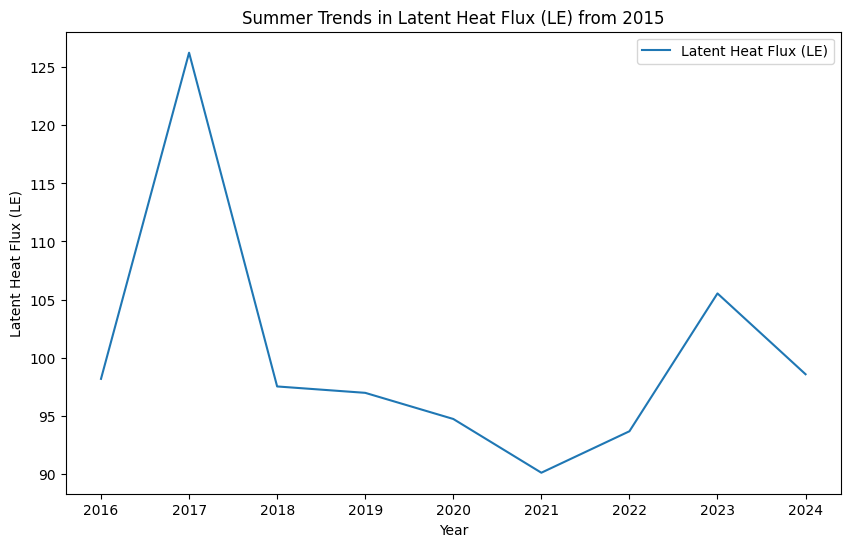

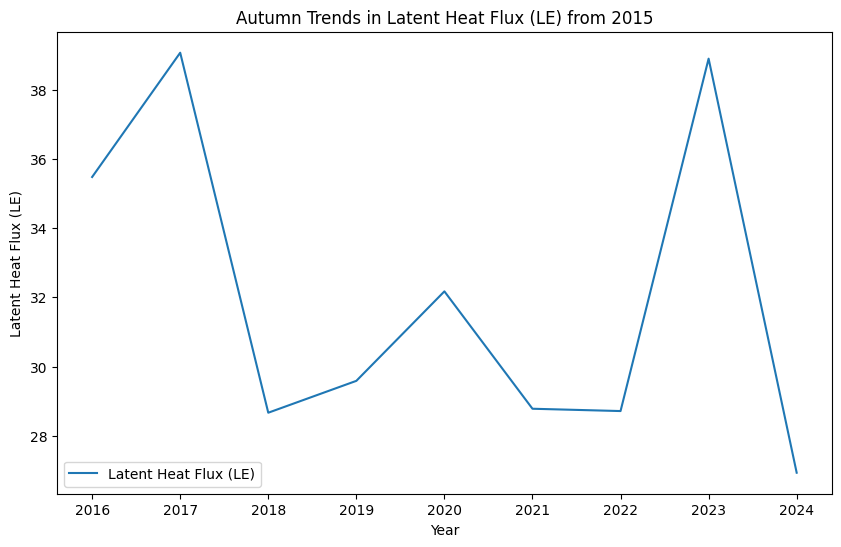

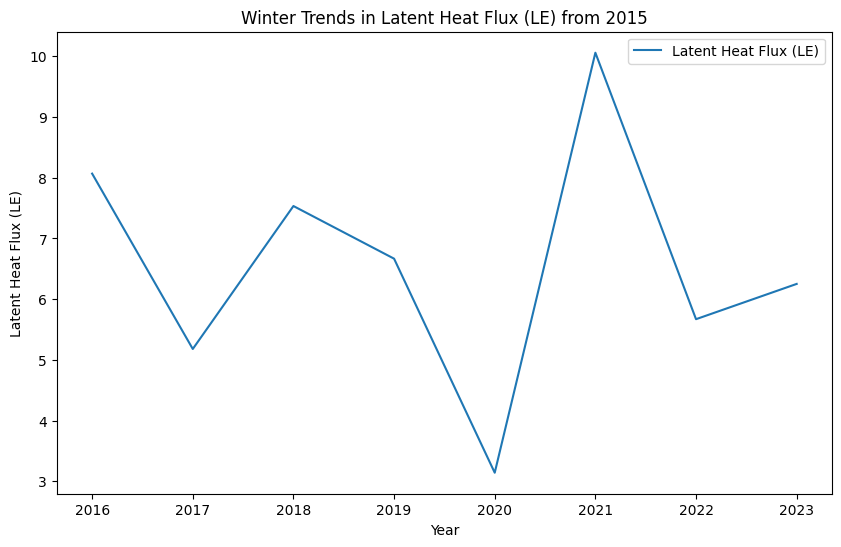

Annual Trend Analysis:
{'trend': 'no trend', 'h': np.False_, 'p_value': np.float64(1.0), 'z_score': 0, 'sens_slope': Sens_Slope_Test(slope=np.float64(-0.16054000694444368), intercept=np.float64(40.87533419444444))}

Seasonal Trend Analysis:
Spring: {'trend': 'no trend', 'h': np.False_, 'p_value': np.float64(0.6021675277481957), 'z_score': np.float64(0.5212860351426869), 'sens_slope': Sens_Slope_Test(slope=np.float64(0.35893019841269846), intercept=np.float64(21.573739206349206))}
Summer: {'trend': 'no trend', 'h': np.False_, 'p_value': np.float64(0.46551216987418664), 'z_score': np.float64(-0.7298004491997617), 'sens_slope': Sens_Slope_Test(slope=np.float64(-0.6508555555555529), intercept=np.float64(100.1241222222222))}
Autumn: {'trend': 'no trend', 'h': np.False_, 'p_value': np.float64(0.2514521865080219), 'z_score': np.float64(-1.1468292773139113), 'sens_slope': Sens_Slope_Test(slope=np.float64(-0.5736802222222219), intercept=np.float64(31.88128422222222))}
Winter: {'trend': 'no tren

In [3]:
import pandas as pd
import pymannkendall as mk
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'ICOSETC_IT-Tor_FLUXNET_MM_L2.csv'
data = pd.read_csv(file_path)

# Convert the TIMESTAMP column to datetime
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'], format='%Y%m')

# Filter data for timestamps greater than December 2014
data_filtered = data[data['TIMESTAMP'] > pd.to_datetime('2014-12-31')]

# Set the TIMESTAMP column as the index
data_filtered.set_index('TIMESTAMP', inplace=True)

# Extract the LE_F_MDS column and rename it to LE
le_data = data_filtered[['LE_F_MDS']].rename(columns={'LE_F_MDS': 'LE'})

# Define a function to resample data
def resample_data(data, freq):
    return data.resample(freq).mean()

# Resample to annual means
annual_le_data = resample_data(le_data, 'YE')

# Function to handle winter season separately
def get_winter_data(data):
    winter_data = []
    years = range(data.index.year.min(), data.index.year.max())
    for year in years:
        # Select December of the current year and January, February of the next year
        winter_period = data.loc[f'{year}-12-01':f'{year+1}-02-28']
        winter_mean = winter_period.mean()
        winter_data.append(winter_mean)
    return pd.DataFrame(winter_data, index=pd.date_range(f'{years.start}-12-01', periods=len(years), freq='YE'))

# Get winter data
winter_le_data = get_winter_data(le_data)

# Resample to seasonal means for Spring, Summer, Autumn
seasonal_le_data = {
    'Spring': le_data[le_data.index.month.isin([3, 4, 5])].resample('YE').mean(),
    'Summer': le_data[le_data.index.month.isin([6, 7, 8])].resample('YE').mean(),
    'Autumn': le_data[le_data.index.month.isin([9, 10, 11])].resample('YE').mean()
}

# Include winter data
seasonal_le_data['Winter'] = winter_le_data

# Define a function to perform trend analysis
def perform_trend_analysis(data):
    if len(data['LE'].dropna()) < 3:  # Ensure there are enough data points
        return {
            'trend': None,
            'h': None,
            'p_value': None,
            'z_score': None,
            'sens_slope': None
        }
    mk_test = mk.original_test(data['LE'].dropna())
    sens_slope = mk.sens_slope(data['LE'].dropna())
    return {
        'trend': mk_test.trend,
        'h': mk_test.h,
        'p_value': mk_test.p,
        'z_score': mk_test.z,
        'sens_slope': sens_slope
    }

# Perform trend analysis on annual data
annual_le_trends = perform_trend_analysis(annual_le_data)

# Perform trend analysis on seasonal data
seasonal_le_trends = {season: perform_trend_analysis(season_data) for season, season_data in seasonal_le_data.items()}

# Define a function to plot trends
def plot_trends(data, title):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x=data.index.year, y='LE', label='Latent Heat Flux (LE)')
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Latent Heat Flux (LE)')
    plt.legend()
    plt.show()

# Plot annual trends
plot_trends(annual_le_data, 'Annual Trends in Latent Heat Flux (LE) from 2015')

# Plot seasonal trends
for season, season_data in seasonal_le_data.items():
    if not season_data.empty:
        plot_trends(season_data, f'{season} Trends in Latent Heat Flux (LE) from 2015')

# Display the trend analysis results
print("Annual Trend Analysis:")
print(annual_le_trends)

print("\nSeasonal Trend Analysis:")
for season, trends in seasonal_le_trends.items():
    print(f"{season}: {trends}")
